In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read in csv file
major_fire_filepath = '../output_data/major_fire.csv'
major_fire_df = pd.read_csv(major_fire_filepath)
major_fire_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders,Started Month
0,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN,8
1,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN,5
2,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN,7
3,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,American Fire,NaN,8/10/13,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN,8
4,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0,5


### Fire incidents pattern

In [11]:
fire_start = major_fire_df['Started']
fire_start_list = list(fire_start)
months = []

for d in range(len(fire_start_list)):
    date = fire_start_list[d].split('/')
    month = date[0]
    months.append(month)

major_fire_df['Started Month'] = months


# Store clean data in csv file
major_fire_df.to_csv('../output_data/major_fire.csv', index=False, header=True)

major_fire_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders,Started Month
0,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN,8
1,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN,5
2,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN,7
3,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,American Fire,NaN,8/10/13,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN,8
4,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0,5


In [12]:
# Change data type in order to sort when ploting graph
fire_trend_df = major_fire_df.astype({'Started Month': 'int64'}).sort_values('Started Month', ascending=True)
fire_trend = fire_trend_df.drop_duplicates(subset=['UniqueId', 'Days Burned','AcresBurned'])

fire_trend.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders,Started Month
1581,30.0,NaN,2019,Humboldt,12,NaN,NaN,NaN,1/15/19,14,...,Pilot Fire,NaN,1/1/19,NaN,NaN,NaN,NaN,6004d3e5-66f8-487a-80a4-689d3852378c,NaN,1
229,120.0,NaN,2014,Placer,31,NaN,NaN,NaN,1/22/14,0,...,Brewer Fire,NaN,1/22/14,NaN,NaN,NaN,NaN,072e04ed-1f34-45e8-b7c2-3788ebf3be4c,NaN,1
1368,0.0,NaN,2018,Santa Barbara,42;56,NaN,NaN,NaN,1/3/19,359,...,Montecito Flooding / Mudflows,NaN,1/9/18,NaN,NaN,NaN,NaN,23cbd274-ded3-43ea-9174-b5615eac3244,NaN,1
188,1952.0,NaN,2014,Los Angeles,19,NaN,NaN,NaN,1/27/14,11,...,Colby Fire,NaN,1/16/14,NaN,NaN,NaN,NaN,1fe0ea01-23e8-47a1-8fbd-ced6cf655e4d,NaN,1
211,333.0,NaN,2014,Humboldt,12,NaN,NaN,NaN,1/8/14,4,...,Red Fire,NaN,1/4/14,NaN,NaN,NaN,NaN,6d75c6a4-12cb-4f18-8951-f2737e980916,NaN,1


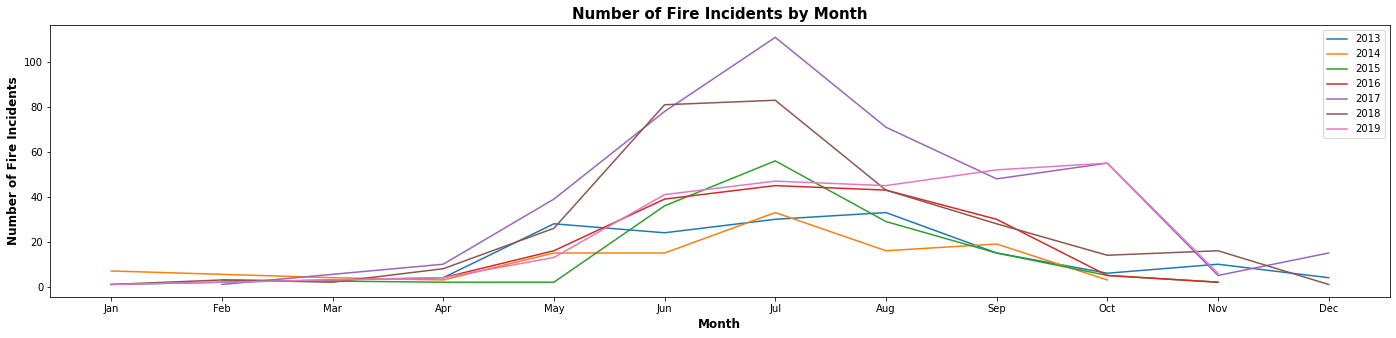

In [14]:
# Generating line chart for each year 
fire_trend_2013 = fire_trend.loc[fire_trend['ArchiveYear'] == 2013]
fire_per_month_2013 = fire_trend_2013['Started Month'].value_counts().sort_index()
plot_2013, = plt.plot(fire_per_month_2013)

fire_trend_2014 = fire_trend.loc[fire_trend['ArchiveYear'] == 2014]
fire_per_month_2014 = fire_trend_2014['Started Month'].value_counts().sort_index()
plot_2014, = plt.plot(fire_per_month_2014)

fire_trend_2015 = fire_trend.loc[fire_trend['ArchiveYear'] == 2015]
fire_per_month_2015 = fire_trend_2015['Started Month'].value_counts().sort_index()
plot_2015, = plt.plot(fire_per_month_2015)

fire_trend_2016 = fire_trend.loc[fire_trend['ArchiveYear'] == 2016]
fire_per_month_2016 = fire_trend_2016['Started Month'].value_counts().sort_index()
plot_2016, = plt.plot(fire_per_month_2016)

fire_trend_2017 = fire_trend.loc[fire_trend['ArchiveYear'] == 2017]
fire_per_month_2017 = fire_trend_2017['Started Month'].value_counts().sort_index()
plot_2017, = plt.plot(fire_per_month_2017)

fire_trend_2018 = fire_trend.loc[fire_trend['ArchiveYear'] == 2018]
fire_per_month_2018 = fire_trend_2018['Started Month'].value_counts().sort_index()
plot_2018, = plt.plot(fire_per_month_2018)

fire_trend_2019 = fire_trend.loc[fire_trend['ArchiveYear'] == 2019]
fire_per_month_2019 = fire_trend_2019['Started Month'].value_counts().sort_index()
plot_2019, = plt.plot(fire_per_month_2019)

# Set xtick and legend
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(positions, labels)
plt.legend([plot_2013,plot_2014,plot_2015,plot_2016,plot_2017,plot_2018,plot_2019], 
            ['2013','2014','2015','2016','2017','2018','2019'], loc='best')

# Set image size
plt.rcParams["figure.figsize"] = (24,5)

# Set x/y label, title
plt.title(f'Number of Fire Incidents by Month', fontweight='bold', fontsize=15)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Number of Fire Incidents', fontweight='bold', fontsize=12)

# Save chart to Images folder
plt.savefig('../Images/PatternbyMonth.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()

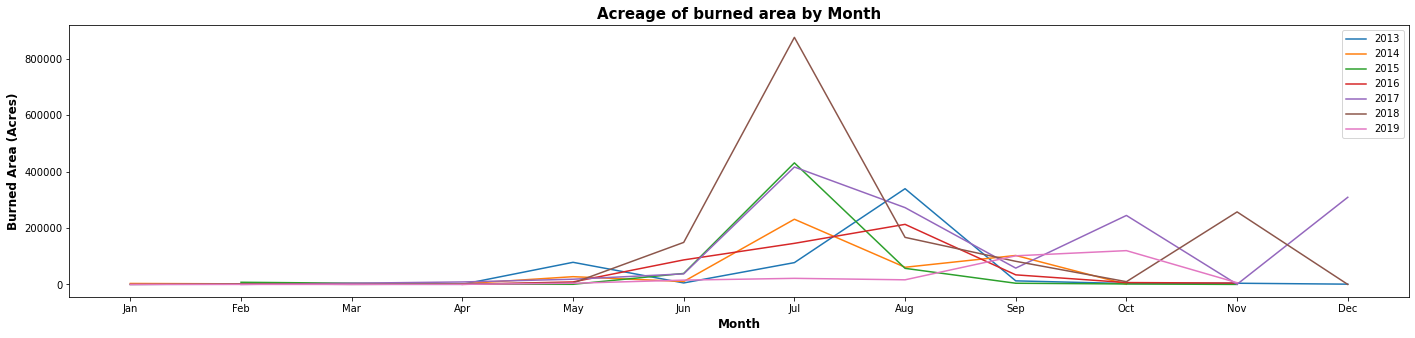

In [15]:
# Generating line chart for each year 
groub_month_2013 = fire_trend_2013.groupby('Started Month')
arces_per_month_2013 = groub_month_2013['AcresBurned'].sum()
a_plot_2013, = plt.plot(arces_per_month_2013)

groub_month_2014 = fire_trend_2014.groupby('Started Month')
arces_per_month_2014 = groub_month_2014['AcresBurned'].sum()
a_plot_2014, = plt.plot(arces_per_month_2014)

groub_month_2015 = fire_trend_2015.groupby('Started Month')
arces_per_month_2015 = groub_month_2015['AcresBurned'].sum()
a_plot_2015, = plt.plot(arces_per_month_2015)

groub_month_2016 = fire_trend_2016.groupby('Started Month')
arces_per_month_2016 = groub_month_2016['AcresBurned'].sum()
a_plot_2016, = plt.plot(arces_per_month_2016)

groub_month_2017 = fire_trend_2017.groupby('Started Month')
arces_per_month_2017 = groub_month_2017['AcresBurned'].sum()
a_plot_2017, = plt.plot(arces_per_month_2017)

groub_month_2018 = fire_trend_2018.groupby('Started Month')
arces_per_month_2018 = groub_month_2018['AcresBurned'].sum()
a_plot_2018, = plt.plot(arces_per_month_2018)

groub_month_2019 = fire_trend_2019.groupby('Started Month')
arces_per_month_2019 = groub_month_2019['AcresBurned'].sum()
a_plot_2019, = plt.plot(arces_per_month_2019)

# Set xtick and legend
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(positions, labels)
plt.legend([a_plot_2013,a_plot_2014,a_plot_2015,a_plot_2016,a_plot_2017,a_plot_2018,a_plot_2019], 
            ['2013','2014','2015','2016','2017','2018','2019'], loc='best')

# Set image size
plt.rcParams["figure.figsize"] = (24,5)

# Set x/y label, title
plt.title(f'Acreage of burned area by Month', fontweight='bold', fontsize=15)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Burned Area (Acres)', fontweight='bold', fontsize=12)

# Save chart to Images folder
plt.savefig('../Images/PatternbyMonth_arces.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()